In [1]:
from pysead import Truss_2D
import pandas as pd

Positive Values for forces: right, up (righthand rule)
Negative moment = clockwise, Positive moment = counter-clockwise (righthand rule)
For adding Local Member Load: Axial Load is always parallel to the member local axis
For adding Local Member Load: Loading is always point downward towards the frame element and is considered positive
Member Forces: at left end to right end (based on local axis) - [Axial, Shear, Bending]. Local Axis is governed for positive/negative values. Right is positive, upward is positive, counterclockwise is positive
Frame Reactions: [horizontal, vertical, Moment]. horizontal - right is positive, vertical - upward is positive, moment - counterclockwise is positive
Frame Moment Release: All elements that is connected to the same release node should be released at node end of the element


In [2]:
nodes_sheet = pd.read_excel('Truss_Template.xlsx', sheet_name='Nodes')
elements_sheet = pd.read_excel('Truss_Template.xlsx', sheet_name='Elements')
areas_sheet = pd.read_excel('Truss_Template.xlsx', sheet_name='Area')
elasticity_sheet = pd.read_excel('Truss_Template.xlsx', sheet_name='Elasticity')
forces_sheet = pd.read_excel('Truss_Template.xlsx', sheet_name='Forces')

nodes = {}
for i in range(len(nodes_sheet)):
    nodes.update({nodes_sheet['Node_Number'][i]: [nodes_sheet['x_coor'][i], nodes_sheet['y_coor'][i]]})

elements = {}
for i in range(len(elements_sheet)):
    elements.update({elements_sheet['Element_Number'][i]: [elements_sheet['Node_1'][i], elements_sheet['Node_2'][i]]})

areas = {}
for i in range(len(areas_sheet)):
    areas.update({areas_sheet['Element_Number'][i]: areas_sheet['Area'][i]})

elasticity = {}
for i in range(len(elasticity_sheet)):
    elasticity.update({elasticity_sheet['Element_Number'][i]: elasticity_sheet['Elasticity'][i]})

forces = {}
for i in range(len(forces_sheet)):
    forces.update({forces_sheet['Node_Number'][i]: [forces_sheet['x_force'][i], forces_sheet['y_force'][i]]})

In [3]:
supports = {3:[1,1],13:[1,1]}

In [4]:
Truss = Truss_2D(nodes = nodes, supports = supports, cross_area = areas, elements = elements, elasticity = elasticity, forces = forces)

In [5]:
Truss.Solve()

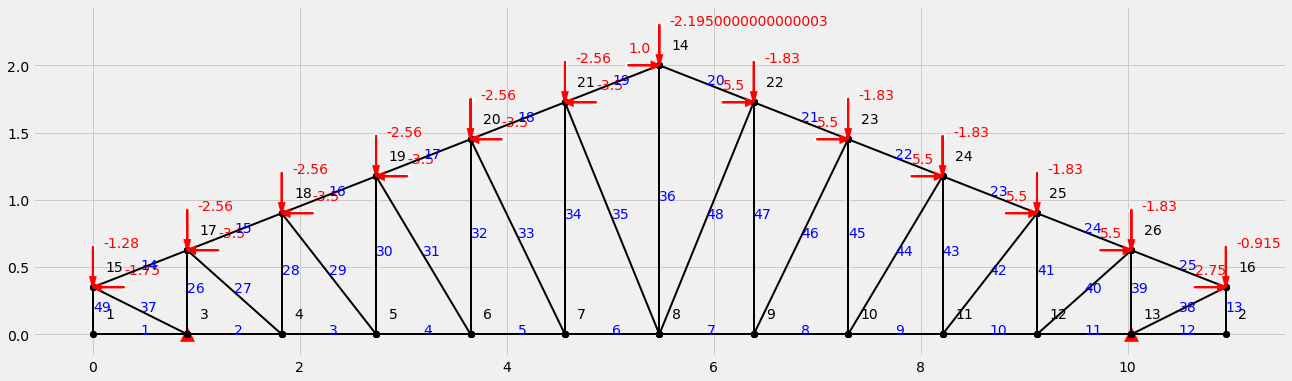

In [6]:
Truss.Draw_Truss_Setup(figure_size= [20,6], length_of_arrow=0.3)

In [7]:
max_tension = []
max_compression = []

for force in Truss.member_forces_:
    if Truss.member_forces_[force] >=0:
        max_tension.append(Truss.member_forces_[force])
    else:
        max_compression.append(Truss.member_forces_[force])
max_tension = max(max_tension)
max_compression = min(max_compression)
print(max_tension, max_compression)

15.97033 -20.36164
